In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical 



import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import math 


In [2]:
train_path = "data/split2/train/"
test_path = "data/split2/test/"
val_path = "data/split2/val/"

In [3]:
cd ..

/Users/miafryer/Documents/flatiron/pneumonia_CT_scan


In [4]:
imgs_bacteria = [file for file in os.listdir(train_path+'BACTERIA') if file.endswith('.jpeg')]
len(imgs_bacteria)

1668

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path, target_size=(64, 64), batch_size = 3514, class_mode='categorical') 

Found 3514 images belonging to 3 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 1171,
        class_mode='categorical') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 1171,
        class_mode='categorical')


Found 1171 images belonging to 3 classes.
Found 1171 images belonging to 3 classes.


In [7]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}


In [8]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
X_train = train_images.reshape((-1, 28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [9]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 3514
Number of testing samples: 1171
Number of validation samples: 1171
train_images shape: (3514, 64, 64, 3)
train_labels shape: (3514, 3)
test_images shape: (1171, 64, 64, 3)
test_labels shape: (1171, 3)
val_images shape: (1171, 64, 64, 3)
val_labels shape: (1171, 3)


In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(3514, 12288)
(1171, 12288)
(1171, 12288)


In [13]:
#train_classes = train_generator.classes 
num_classes_train = len(train_generator.class_indices) 
#train_labels_cat = to_categorical(train_classes, num_classes=num_classes_train)

In [14]:
model = Sequential() 
model.add(Flatten(input_shape=train_img.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes_train, activation='softmax'))

model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

In [16]:
history = model.fit(train_img, train_labels, 
   epochs=10,
   batch_size=50, 
   validation_data=(val_img , val_labels))

Epoch 1/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7479 - acc: 0.6827 - val_loss: 0.7567 - val_acc: 0.6524
Epoch 2/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7398 - acc: 0.6838 - val_loss: 0.8690 - val_acc: 0.6678
Epoch 3/10
71/71 [==============================] - 1s 8ms/step - loss: 0.7109 - acc: 0.6938 - val_loss: 0.6573 - val_acc: 0.7190
Epoch 4/10
71/71 [==============================] - 1s 9ms/step - loss: 0.7326 - acc: 0.6941 - val_loss: 0.6904 - val_acc: 0.7088
Epoch 5/10
71/71 [==============================] - 1s 9ms/step - loss: 0.6936 - acc: 0.7012 - val_loss: 0.6059 - val_acc: 0.7344
Epoch 6/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6958 - acc: 0.6929 - val_loss: 0.6699 - val_acc: 0.7088
Epoch 7/10
71/71 [==============================] - 1s 9ms/step - loss: 0.6936 - acc: 0.7040 - val_loss: 0.7447 - val_acc: 0.6772
Epoch 8/10
71/71 [==============================] - 1s 8ms/step - loss: 0.6804 - acc: 0.70

In [18]:
(eval_loss, eval_accuracy) = model.evaluate( 
    test_img , test_labels, batch_size=50, verbose=1)

24/24 [==============================] - 0s 3ms/step - loss: 0.6048 - acc: 0.7259


In [19]:
y_hat_test = model.predict(test_img) 

In [20]:
categorical_test_labels = pd.DataFrame(test_labels,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_hat_test,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)

<AxesSubplot:>

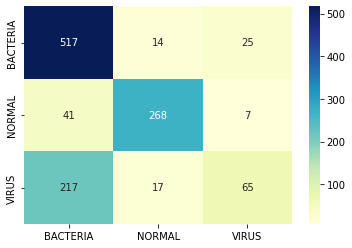

In [21]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])

In [25]:
classification_metrics= classification_report(categorical_test_labels,categorical_preds, target_names=['BACTERIA', 'NORMAL' ,'VIRUS'])
print(classification_metrics)

              precision    recall  f1-score   support

    BACTERIA       0.67      0.93      0.78       556
      NORMAL       0.90      0.85      0.87       316
       VIRUS       0.67      0.22      0.33       299

    accuracy                           0.73      1171
   macro avg       0.74      0.67      0.66      1171
weighted avg       0.73      0.73      0.69      1171



In [48]:

model2 = models.Sequential()
#model2.add(Flatten(input_shape=train_img.shape[1:])) 
model2.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model2.add(layers.Dense(7, activation='relu'))
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(num_classes_train, activation='softmax'))

model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [49]:
history = model2.fit(train_img, train_labels, 
   epochs=10,
   batch_size=50, 
   validation_data=(val_img,val_labels))

Epoch 1/10
71/71 [==============================] - 0s 5ms/step - loss: 1.1344 - accuracy: 0.3497 - val_loss: 1.0746 - val_accuracy: 0.4936
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0677 - accuracy: 0.4736 - val_loss: 1.0564 - val_accuracy: 0.4791
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.4803 - val_loss: 1.0311 - val_accuracy: 0.4791
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0294 - accuracy: 0.4918 - val_loss: 1.0508 - val_accuracy: 0.5278
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0163 - accuracy: 0.5244 - val_loss: 0.9979 - val_accuracy: 0.5687
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9918 - accuracy: 0.5761 - val_loss: 0.9819 - val_accuracy: 0.5594
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.9497 - accuracy: 0.6233 - val_loss: 1.0073 - val_accuracy: 0.4321
Epoch 8/10
71/71 [==

In [51]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                245780    
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 18        
Total params: 245,985
Trainable params: 245,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

In [30]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(num_classes_train, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [31]:
history3 = model3.fit(train_img, train_labels, 
   epochs=10,
   batch_size=50, 
   validation_data=(val_img, val_labels))

Epoch 1/10


ValueError: in user code:

    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 12288)


In [50]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/intel-image-classification/seg_train/seg_train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        '/kaggle/input/intel-image-classification/seg_test/seg_test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)